#**CROP SUGGESTION ANALYSIS**

Precision agriculture is a modern farming technique that uses the data of soil charachteristics, soil types, crop yield data, weather conditions and suggests the farmers with the most optimal crop to grow in their farms for maximum yield and profit.

This technique can reduce the crop failures and will help the farmers to take informed decision about their farming strategy.


**DATA FIELDS MENTIONED**

*   P - ratio of Phosphorous content in soil
*   N - ratio of Nitrogen content in soil
*   K - ratio of Potassium content in soil
*   humidity - relative humidity in %
*   ph - ph value of the soil
*   rainfall - rainfall in mm
*   temperature - temperature in degree Celsius















**Importing necessary Libraries**

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree

In [431]:
import warnings
warnings.filterwarnings('ignore')

**DATASET UPLOADING**

In [432]:
df=pd.read_csv("/content/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [433]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [435]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [436]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [437]:
df.size

17600

In [438]:
df.shape

(2200, 8)

In [439]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [440]:
df["label"].unique()
print(len(df["label"].unique()))

22


In [441]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [442]:
cs=pd.pivot_table(df,index=['label'],aggfunc='mean')
cs.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


**DATA VISUALIZATION AND ANALYSIS**

**Evaluation of crops based on the values of N,K,P**

In [443]:
import plotly.graph_objects as go

cs=cs.sort_values(by='N', ascending=False)
cs=cs.sort_values(by='P', ascending=False)
cs=cs.sort_values(by='K', ascending=False)

fig=go.Figure()
fig.add_trace(go.Bar(x=cs.index,y=cs['N'],name='Nitrogen',marker_color='indianred'))
fig.add_trace(go.Bar(x=cs.index,y=cs['P'],name='Phosphorous',marker_color='blue'))
fig.add_trace(go.Bar(x=cs.index,y=cs['K'],name='Potash',marker_color='green'))

fig.update_layout(title="Nitrogen,Phosphorous and Potassium values comparison among the crops",plot_bgcolor='white',barmode='group',xaxis_tickangle=-45)
fig.show()

**Evaluation of crops based on natural calamities**

In [444]:
import plotly.express as px

fig = px.bar(cs,x=cs.index,y=["temperature","rainfall","humidity"])
fig.update_layout(title_text="Comparison between rainfall, temerature and humidity",height=500)
fig.show()

**HEATMAP DISPLAYING THE CORRELATION BETWEEN DIFFERENT FEATURES**

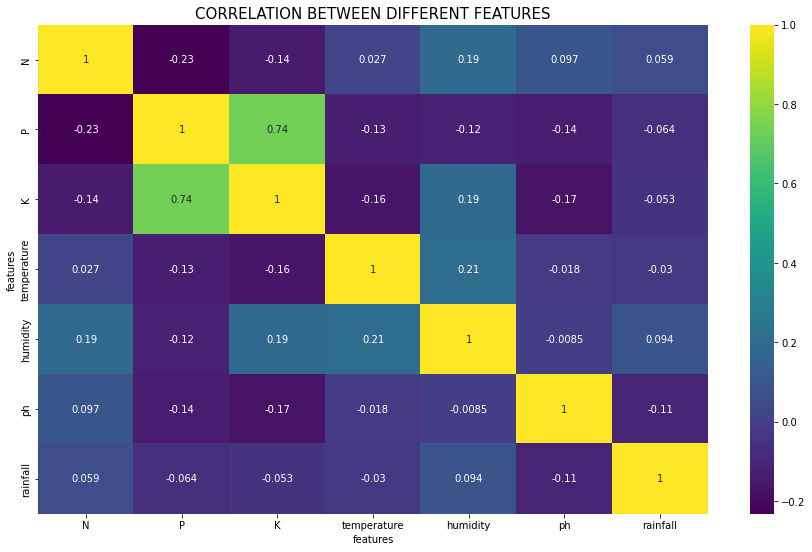

In [445]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('CORRELATION BETWEEN DIFFERENT FEATURES',fontsize = 15,c='black')
plt.show()

**DECLARING INDEPENDENT AND TARGET VARIABLES**

In [446]:
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
target = df['label']
labels = df['label']

**SPLITTING TRAIN AND TEST DATA**

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size = 0.2,random_state=2)

**LIST OF ALGORITHMS IMPLEMENTED**

*   DECISION TREE ALGORITHM
*   SUPPORT VECTOR MACHINE
*   RANDOM FOREST
*   ADA BOOST
*   XGBOOST
*   K-Nearest Neighbors
*   NAIVE BAYES CLASSIFIER
*   LOGISTIC REGRESSION
*   LIGHTGBM 





**Initializing empty lists to append all modelsand corresponding name**

In [448]:
acc = []
model = []

**DECISION TREE ALGORITHM**

In [449]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion="entropy")
DT.fit(X_train,Y_train)
Y_Pred=DT.predict(X_test)

a = metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("DT")
print("Accuracy Score accquired from Decision Tree:", a*100)

Accuracy Score accquired from Decision Tree: 98.86363636363636


In [450]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DT,features,target,cv=10,scoring="accuracy").mean()
score

0.9863636363636363

**SUPPORT VECTOR MACHINE**

PREPROCESSING

In [451]:
#from sklearn.preprocessing import MinMaxScaler
#sc=MinMaxScaler()
#sc.fit(X_train)
#X_train_new=sc.transform(X_train)
#X_test_new=sc.transform(X_test)

In [452]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear")
SVM.fit(X_train,Y_train)
Y_Pred=SVM.predict(X_test)

a=metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("SVM")
print("Accuracy Score accquired from SVM:",a*100)

Accuracy Score accquired from SVM: 97.72727272727273


In [453]:
score=cross_val_score(SVM,features,target,cv=10,scoring="accuracy").mean()
score

0.9854545454545454

**RANDOM FOREST**

In [454]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=150)
RF.fit(X_train,Y_train)
Y_Pred=RF.predict(X_test)

a=metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("RF")
print("Accuracy Score accquired from Random Forest:",a*100)

Accuracy Score accquired from Random Forest: 99.54545454545455


In [455]:
score=cross_val_score(RF,features,target,cv=10,scoring="accuracy").mean()
score

0.9945454545454545

**ADABOOST CLASSIFIER**

In [456]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier(n_estimators=200)
ABC.fit(X_train,Y_train)
Y_Pred=ABC.predict(X_test)

a=metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("ABC")
print("Accuracy acquired from ADABOOST CLASSIFIER:",a*100)

Accuracy acquired from ADABOOST CLASSIFIER: 19.545454545454547


In [457]:
score=cross_val_score(ABC,features,target,cv=10,scoring="accuracy").mean()
score

0.13636363636363633

**XGBOOST**

In [458]:
import xgboost as xgb
XB=xgb.XGBClassifier()
XB.fit(X_train,Y_train)
Y_Pred=XB.predict(X_test)

a=metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("XGBoost")
print("Accuracy acquired from XGBoost:",a*100)

Accuracy acquired from XGBoost: 99.31818181818181


In [459]:
score=cross_val_score(XB,features,target,cv=10,scoring="accuracy").mean()
score

0.9931818181818182

**K-Nearest Neighbors**

In [460]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,Y_train)
Y_Pred=Knn.predict(X_test)

a = metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("Knn")
print("Accuracy acquired from K-Nearest Neighbors:",a*100)

Accuracy acquired from K-Nearest Neighbors: 97.04545454545455


In [461]:
score=cross_val_score(Knn,features,target,cv=10,scoring="accuracy").mean()
score

0.9804545454545457

**NAIVE BAYES CLASSIFIER**

In [462]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,Y_train)
Y_Pred=NB.predict(X_test)

a=metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("NB")
print("Accuracy acquired from Naive Bayes:",a*100)

Accuracy acquired from Naive Bayes: 99.0909090909091


In [463]:
score=cross_val_score(NB,features,target,cv=10,scoring="accuracy").mean()
score

0.9950000000000001

**LOGISTIC REGRESSION**

In [465]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=2)
LR.fit(X_train,Y_train)
Y_Pred=LR.predict(X_test)

a=metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("LR")
print("Accuracy acquired from Logistic Regression:",a*100)

Accuracy acquired from Logistic Regression: 95.22727272727273


In [466]:
score=cross_val_score(LR,features,target,cv=10,scoring="accuracy").mean()
score

0.9604545454545453

**LightGBM Model**

In [467]:
import lightgbm as lgb
LGB= lgb.LGBMClassifier()
LGB.fit(X_train,Y_train)
Y_Pred=LGB.predict(X_test)

a = metrics.accuracy_score(Y_test,Y_Pred)
acc.append(a)
model.append("LGB")
print("Accuracy acquired from LightGBM :",a*100)

Accuracy acquired from LightGBM : 99.0909090909091


In [468]:
score=cross_val_score(LGB,features,target,cv=10,scoring="accuracy").mean()
score

0.9904545454545456

**BAR CODE REPRESENTATION OF THE ACCURACY SCORES ACQUIRED FROM VARIOUS ALGORITHMS**

In [469]:
accuracy_models = dict(zip(model,acc))
for a,b in accuracy_models.items():
    print (a,'-',b)

DT - 0.9886363636363636
SVM - 0.9772727272727273
RF - 0.9954545454545455
ABC - 0.19545454545454546
XGBoost - 0.9931818181818182
Knn - 0.9704545454545455
NB - 0.990909090909091
LR - 0.9522727272727273
LGB - 0.990909090909091


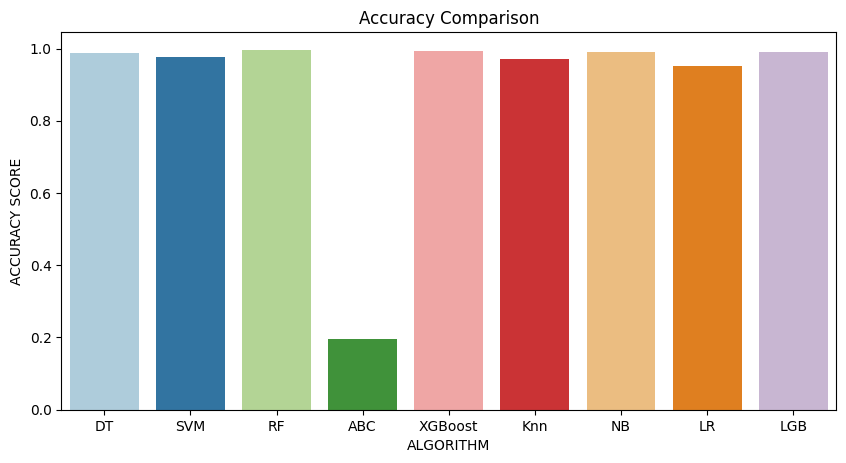

In [472]:
plt.figure(figsize=[10,5],dpi=100)
plt.title("Accuracy Comparison")
plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY SCORE")
sns.barplot(x=model,y=acc,palette="Paired")

**CLASSIFICATION REPORT AND CONFUSION MATRIX DISPLAY**

In [471]:
lst=[DT,SVM,RF,ABC,XB,Knn,NB,LR,LGB]
from sklearn.metrics import classification_report
for i in lst:
  i.fit(X_train,Y_train)
  Y_Pred=i.predict(X_test)
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

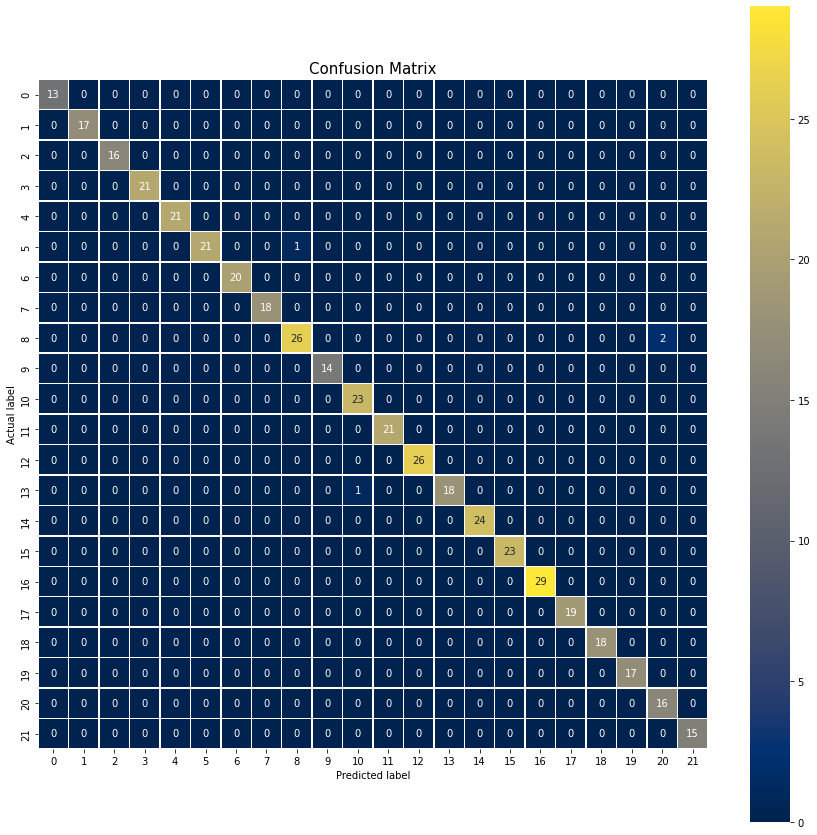

In [473]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_Pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt=".0f",linewidths=.5,square=True,cmap ='cividis');
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title="Confusion Matrix"
plt.title(all_sample_title,size = 15);
plt.show()

**RANDOM PREDICTION**

In [474]:
data=np.array([[104,18,30,23.603016,60.3,6.7,140.91]])
prediction=DT.predict(data)
print("RECOMMENDED CROP",prediction)

RECOMMENDED CROP ['coffee']


In [ ]:
data=np.array([[83,45,60,28,70.3,7.0,150.9]])
prediction=DT.predict(data)
print("RECOMMENDED CROP",prediction)

In [477]:
data=np.array([[104,18,30,23.603016,60.3,6.7,140.91]])
prediction=SVM.predict(data)
print("RECOMMENDED CROP",prediction)

RECOMMENDED CROP ['coffee']


In [476]:
data=np.array([[104,18,30,23.603016,60.3,6.7,140.91]])
prediction=RF.predict(data)
print("RECOMMENDED CROP",prediction)

RECOMMENDED CROP ['coffee']


In [478]:
data=np.array([[60,55,44,23.004459,82.320763,7.840207,263.964248]])
prediction=LR.predict(data)
print("RECOMMENDED CROP",prediction)

RECOMMENDED CROP ['rice']
